In [16]:

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer


In [17]:

# Extraer BD con reseñas
df = pd.read_excel('BBDD.xlsx')
df.head()


,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [18]:

# Selección de columnas
df = df[['sentimiento', 'review_es']].copy()
df.head()


,sentimiento,review_es
0,positivo,Uno de los otros críticos ha mencionado que de...
1,positivo,Una pequeña pequeña producción.La técnica de f...
2,positivo,Pensé que esta era una manera maravillosa de p...
3,negativo,"Básicamente, hay una familia donde un niño peq..."
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una..."


In [19]:
df['sentimiento'].value_counts()

sentimiento
positivo    25000
negativo    25000
Name: count, dtype: int64

In [20]:

newcol = {'positivo': 1, 'negativo': 0}
df['Feeling'] = df['sentimiento'].map(newcol)
df = df.drop('sentimiento',axis=1)
df.head()


,review_es,Feeling
0,Uno de los otros críticos ha mencionado que de...,1
1,Una pequeña pequeña producción.La técnica de f...,1
2,Pensé que esta era una manera maravillosa de p...,1
3,"Básicamente, hay una familia donde un niño peq...",0
4,"El ""amor en el tiempo"" de Petter Mattei es una...",1


In [21]:

df_train, df_test = train_test_split(df)
vectorizer = TfidfVectorizer(max_features=1000)

X_train = vectorizer.fit_transform(df_train['review_es'])
X_test = vectorizer.transform(df_test['review_es'])

Y_train = df_train['Feeling']
Y_test = df_test['Feeling']

model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

print("Train accuracy:", model.score(X_train, Y_train))
print("Test accuracy:", model.score(X_test, Y_test))


Train accuracy: 0.85656
Test accuracy: 0.84352


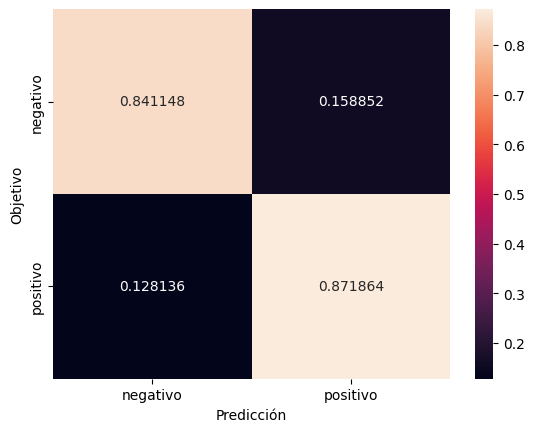

In [22]:

P_train = model.predict(X_train)
P_test = model.predict(X_test)

cm = confusion_matrix(Y_train, P_train, normalize='true')

def plot_cm(cm):
    classes = ['negativo', 'positivo']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Objetivo")

plot_cm(cm)


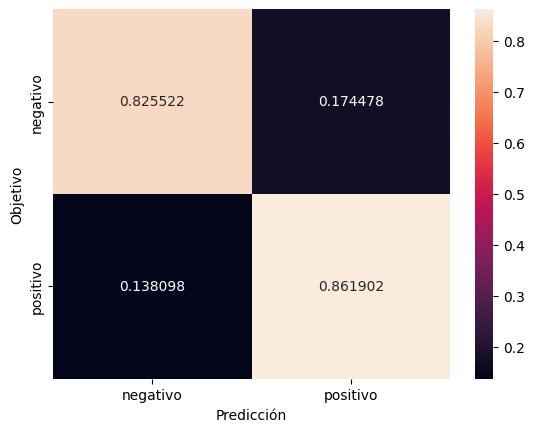

In [23]:

cm = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm)


In [24]:
word_index_map = vectorizer.vocabulary_
corte = 4

print("Palabras más positivas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte:
        print(word, weight)

Palabras más positivas:
encantó 4.630362511115104
excelentes 4.4913710881267805
genial 4.0371955416037615
increíble 4.546043659949082
mejores 4.073078251029248
hoy 4.334284989141881
excelente 8.395590837877373
disfruté 4.754261454210491
brillante 4.03378830999976
maravilloso 4.008882757718451
perfecto 4.836582021454578
maravillosa 4.120891206614468


In [25]:
print("Palabras más negativas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -corte:
        print(word, weight)

Palabras más negativas:
mal -5.640765125158308
basura -5.282505660725788
menos -4.236375986047993
desafortunadamente -4.941562188831697
terrible -7.996044211045605
mierda -4.00541095670878
peor -11.43274445991062
aburrido -6.7158620621046135
horrible -9.501715318490374
peores -7.46482855138212
pobre -5.941855530590788
mala -7.334268688375538
aburrida -6.866572924456242


In [ ]:
prueba = ["Estuvo muy entretenida la película", "Terrible la película, me aburrí mucho", "Íncreible la historia y todo", "Peor que la primera parte"]
x = vectorizer.transform(prueba)

# Predecir con el modelo
P = model.predict(x)
clases = model.classes_

for i in range (len(prueba)):
    if clases[P[i]] == 0:
        print(f"el Comentario: '{prueba[i]}' es: Negativo")
    else:
        print(f"el Comentario: '{prueba[i]}' es: Positivo")

el Comentario: 'Estuvo muy entretenida la película' es: Positivo
el Comentario: 'Terrible la película, me aburrí mucho' es: Negativo
el Comentario: 'Íncreible la historia y todo' es: Positivo
el Comentario: 'Peor que la primera parte' es: Negativo
